<a href="https://colab.research.google.com/github/Akshay13042001/Water-Quality/blob/master/watr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                Water Quality and Potability





# About Dataset


This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption

# Columns:

pH: The pH level of the water.

Hardness: Water hardness, a measure of mineral content.

Solids: Total dissolved solids in the water.

Chloramines: Chloramines concentration in the water.

Sulfate: Sulfate concentration in the water.

Conductivity: Electrical conductivity of the water.

Organic_carbon: Organic carbon content in the water.

Trihalomethanes: Trihalomethanes concentration in the water.

Turbidity: Turbidity level, a measure of water clarity.

Potability: Target variable; indicates water potability with values 1 (potable) and 0 (not potable).

#Importing the basic libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
df=pd.read_csv('/content/drive/MyDrive/ML Project/water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [2]:
df.shape #rows,columns

(3276, 10)

In [3]:
df.nunique().sort_values()      #Checking number of unique rows in each feature

Potability            2
Sulfate            2495
ph                 2785
Trihalomethanes    3114
Hardness           3276
Solids             3276
Chloramines        3276
Conductivity       3276
Organic_carbon     3276
Turbidity          3276
dtype: int64

# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Right here we have null values so for the right solution we have to clean this values

In [5]:
df.isna().sum() #we have 3276 rows and there is a 781 row missing value in suflate data this is highest we already have small data and there is almost 1000 rows is null value
# so we have 2 options -remove the data (which is not okay because we have small data)
#                      -fill the data (fill the data with mean values (we will use this))

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
df.fillna(df.mean(),inplace=True)

 so where ever ph=null it will get replaced with 7.080795, sulfate=null get replaced with 333.775777, Trihalomethanes=null get replaced with 66.396293

In [7]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [8]:
df    #we removed null values permanently and the data cleaning has been done

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


# Exploratoy Data Analysis

In [9]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [10]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


Checking if we need to do Dimensonility Reduction

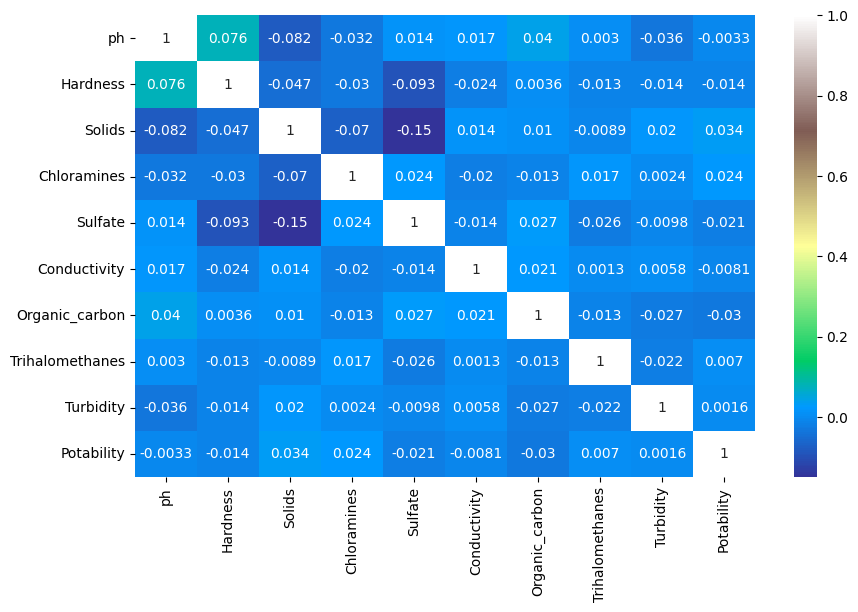

In [11]:
sns.heatmap(df.corr(),annot= True,cmap='terrain')
fig= plt.gcf()
fig.set_size_inches(10,6)
plt.show()

we are trying to reduce the dimension to which are correlating, for that we are looking for the similarity of the features with this chart
because less feature is making easy to the predict but we have so small similarity of the features and we cant use the remove feature

# Lets check the Outlier using Box Plot

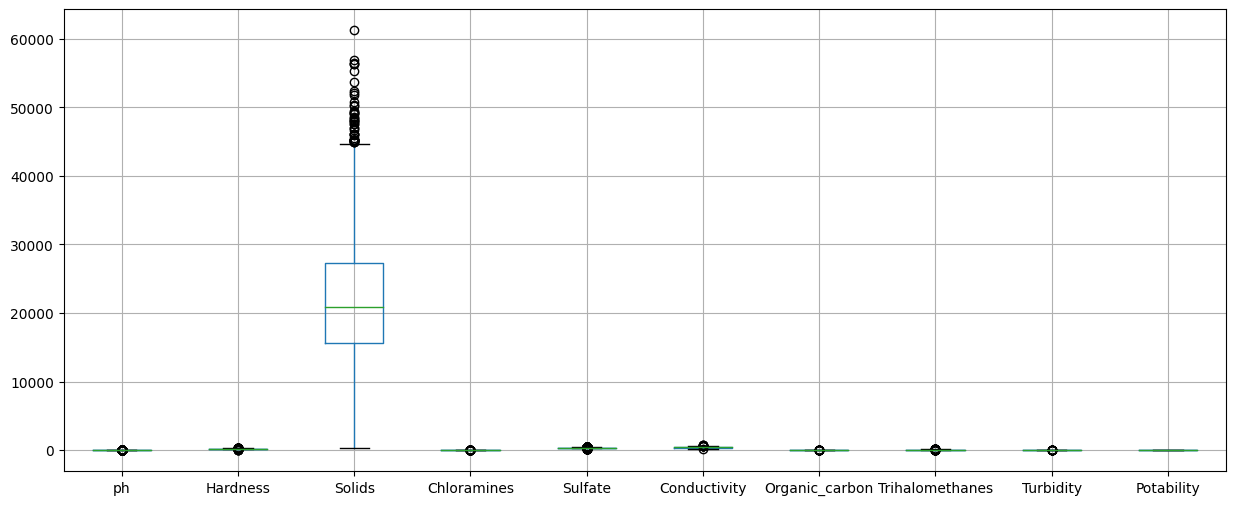

In [12]:
df.boxplot(figsize=(15,6))
plt.show()

You can see outliers but if we remove this outliers we cant have good prediction, the result will be closer to good water
Our purpose in not removing outlier is to estimate from a wide range of data

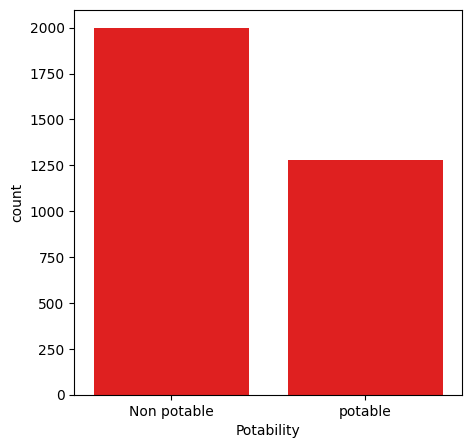

In [13]:
plt.figure(figsize=(5,5))
sns.countplot( x=df["Potability"].map({0:'Non potable',1:'potable'}), color="red")
plt.show()

Here non potable  is greater than potable value

# Partitioning

In [14]:
x=df.iloc[:,:-1]
x

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


In [15]:
y=df.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [16]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.3,random_state=1)

# Model Training


# RandomForestClassifier

In [18]:
rc=RandomForestClassifier()
rc.fit(x_train,y_train)

RandomForestClassifier()

In [19]:
y_pred=rc.predict(x_test)

In [20]:
print(accuracy_score(y_test,y_pred)*100)

65.51373346897253


The accuracy is too low

# Hyper Parameter Tuning

In [21]:
# from sklearn.model_selection import GridSearchCV
# param={'n_estimators':[500],'criterion':['gini','entropy','log_loss'],'max_features':['auto','sqrt','log2']}
# clf=GridSearchCV(rc,param,cv=10,scoring='accuracy')
# clf.fit(x_train,y_train)

To improve the accuracy we use GridSearchCV for best parameters

In [22]:
# print(clf.best_params_)

In [23]:
y.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

The value 0 is greater than 1

# Over Sampling

In [24]:
from imblearn.over_sampling import SMOTE
os=SMOTE()
x_os,y_os=os.fit_resample(x_scaled,y)

We use over_sampling method to make equal number of output values

In [25]:
y_os.value_counts()

0    1998
1    1998
Name: Potability, dtype: int64

In [26]:
x_os_scaled=scalar.fit_transform(x_os)

In [27]:
x_train_os,x_test_os,y_train_os,y_test_os=train_test_split(x_os_scaled,y_os,test_size=.3,random_state=1)

In [28]:
rc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_features='sqrt')
rc.fit(x_train_os,y_train_os)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [29]:
y_pred2=rc.predict(x_test_os)
y_pred2

array([1, 0, 0, ..., 1, 1, 1])

In [30]:
y_test_os

200     0
2861    1
610     0
1918    1
3560    1
       ..
549     0
3255    1
1534    1
218     0
3748    1
Name: Potability, Length: 1199, dtype: int64

74.64553794829024
              precision    recall  f1-score   support

           0       0.73      0.78      0.75       593
           1       0.77      0.71      0.74       606

    accuracy                           0.75      1199
   macro avg       0.75      0.75      0.75      1199
weighted avg       0.75      0.75      0.75      1199



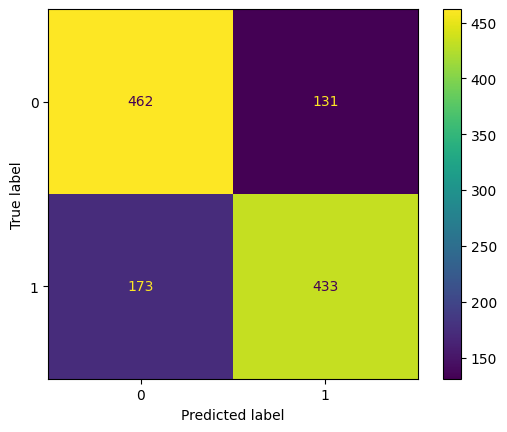

In [31]:
print(accuracy_score(y_test_os,y_pred2)*100)
print(classification_report(y_test_os,y_pred2))
print(ConfusionMatrixDisplay.from_predictions(y_test_os,y_pred2))

Now we got a better accuracy than before

In [32]:
y_new=rc.predict(scalar.transform([[4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821]]))
if y_new==0:
  print('Non Potable Water')
else:
  print('Potable Water')

Potable Water


We got a correct prediction on this accuracy

# **Summary**

By applying Hyperparameter Tuning and Over_sampling methods we were able increase the accuracy and improve our model